###**ABOUT DATASET**
##### Yelp Dataset is web and mobile platform that functions as a crowd-sourced local business review site. Users can submit reviews, photos and tips about businesses, while also browsing information and rating left by others.

## Resources
https://www.yelp.com/dataset

#**Problem Statement**
##### In a competitive market like the restaurants industry, understanding the factors that influence business success is crucial for stakeholders. Utilizing the Yelp dataset, this projects aim to investigate the relationship between user engagment(reviews, tips and check- in) and business success metrics(review count, rating) for restaurants.

#**Research Objectives**

1.   **Quantify the correlation between user engagment(reviews, tips, check-ins) and review count/average star rating:** this help us determine if restaurants with user engagment experiance a corresponding increase inreviews and ratings.

2.   **Analyze the impact of sentiment on review count and average star rating:** we will investigate if possitive sentiment in reviews and tips translate to higher star rating and potentially influences the total number of reviews left.

3.   **Time trends in user Engagment:** we will explore if consistent user engagment over time is a stronger indicator of long-term success compared to sporadic bursts of activity.



#**Hypothesis Testing**

*   Higher level of user engagment (more reviews, tips and check-ins) correlate with higher review counts andrating for restaurants.
*   Positive sentiment expressed in reviews and tips contribute to higher overall ratings and review counts for restaurants.
*   Consistent engagment over time is positively associated with sustained business successs for restaurants.



#**Importing Libraries**


In [3]:
!pip install mysql-connector-python

In [6]:
!pip install sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 39.8 MB/s eta 0:00:00


In [7]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.8 MB/s eta 0:00:00


In [8]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.2 MB/s eta 0:00:00


In [9]:
import json
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

###Open json dataset and store in tabular format

In [10]:
with open('/content/drive/MyDrive/Temporary_data_file/yelp_academic_dataset_business.json','r') as f:
    yelp_business_data = [json.loads(line) for line in f]
yelp_business_df = pd.DataFrame(yelp_business_data)

In [11]:
with open('/content/drive/MyDrive/Temporary_data_file/yelp_academic_dataset_checkin.json','r') as f:
    yelp_checkin_data = [json.loads(line) for line in f]
yelp_checkin_df = pd.DataFrame(yelp_checkin_data)

In [12]:
with open('/content/drive/MyDrive/Temporary_data_file/yelp_academic_dataset_tip.json','r') as f:
    yelp_tip_data = [json.loads(line) for line in f]
yelp_tip_df = pd.DataFrame(yelp_tip_data)

In [13]:
with open('/content/drive/MyDrive/Temporary_data_file/yelp_academic_dataset_user.json','r') as f:
    yelp_user_data = [json.loads(line) for line in f]
yelp_user_df = pd.DataFrame(yelp_user_data)

In [14]:
with open('/content/drive/MyDrive/Temporary_data_file/yelp_academic_dataset_review.json','r') as f:
    yelp_review_data = [json.loads(line) for line in f]
yelp_review_df = pd.DataFrame(yelp_review_data)

In [15]:
print(yelp_user_df.shape)
print(yelp_tip_df.shape)
print(yelp_checkin_df.shape)
print(yelp_business_df.shape)
print(yelp_review_df.shape)

(1987897, 22)
(908915, 5)
(131930, 2)
(150346, 14)
(6990280, 9)


In [16]:
yelp_business_df.drop(['attributes','hours'], axis=1, inplace=True)

In [17]:
# engine = create_engine('mysql+mysqlconnector://yelp_dataset')
engine = create_engine('sqlite:///yelp_dataset')

In [18]:
engine

Engine(sqlite:///yelp_dataset)

In [19]:
def load_dataframe(df,table_name,engine):
    df.to_sql(table_name,con=engine,if_exists='replace',index=False)

In [20]:
load_dataframe(yelp_business_df,'business',engine)
load_dataframe(yelp_checkin_df,'checkin',engine)
load_dataframe(yelp_tip_df,'tip',engine)
load_dataframe(yelp_user_df,'user',engine)
load_dataframe(yelp_review_df,'review',engine)

In [21]:
# connect to database
conn = sqlite3.connect('yelp_dataset')

In [22]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'",conn)

In [23]:
tables

,name
0,business
1,checkin
2,tip
3,user
4,review


In [24]:
for table_name in tables['name']:
  display(pd.read_sql_query(f"SELECT * FROM {table_name} limit 5",conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


# **Exploratory Data Analysis**

In [25]:
pd.read_sql_query(f"SELECT count(*) FROM business ",conn)

,count(*)
0,150346


In [26]:
# same as above
pd.read_sql_query(f"SELECT distinct count(*) FROM business ",conn)

,count(*)
0,150346


In [27]:
# Total resturant business
pd.read_sql_query(f"SELECT business_id FROM business where lower(categories) like '%restaurant%' ",conn)

,business_id
0,MTSW4McQd7CbVtyjqoe9mw
1,CF33F8-E6oudUQ46HnavjQ
2,k0hlBqXX-Bt0vf1op7Jr1w
3,bBDDEgkFA1Otx9Lfe7BZUQ
4,eEOYSgkmpB90uNA7lDOMRA
...,...
52281,l9eLGG9ZKpLJzboZq-9LRQ
52282,cM6V90ExQD6KMSU3rRB5ZA
52283,WnT9NIzQgLlILjPT0kEcsQ
52284,2O2K6SXPWv56amqxCECd4w


In [28]:
# resturant business that are open
business_id = pd.read_sql_query(f"SELECT business_id,review_count FROM business where lower(categories) like '%restaurant%' and is_open = 1 ",conn)
business_id



*   Out of 150K businessess, 35K are restaurants business and are open.



In [29]:
# what is the discriptive stars for reviews count and rating for businesses?
# avg, min, max, median
pd.read_sql_query(f"""SELECT
avg(review_count) as avg_review_count,
min(review_count) as min_review_count,
max(review_count) as max_review_count,
(select review_count from business order by review_count limit 1 offset (select count(*)/2 from business)) as median_review_count,

avg(stars) as avg_stars_count,
min(stars)as min_stars_count,
max(stars)as max_stars_count,
(select stars from business order by stars limit 1 offset (select count(*)/2 from business)) as median_stars_count
from business where business_id in{tuple(business_id['business_id'])}""",conn).transpose()

,0
avg_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_stars_count,3.523969
min_stars_count,1.000000
max_stars_count,5.000000
median_stars_count,3.500000



*   Analysing the median and maximun review count revealed asignificant number of restaurants with much higher review counts compared to others. this could skew further analysis.
*   To address this we decided to remove restaurants with outlier review counts.
*   We will implement to identify and remove outliers using the Interquartile Range (IQR) method.



In [30]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [31]:
business_id = remove_outliers(business_id, 'review_count')

In [32]:
business_id.shape

(31537, 2)

In [33]:
# after removing outliers
# what is the discriptive stars for reviews count and rating for businesses?
# avg, min, max, median
pd.read_sql_query(f"""SELECT
avg(review_count) as avg_review_count,
min(review_count) as min_review_count,
max(review_count) as max_review_count,
(select review_count from business order by review_count limit 1 offset (select count(*)/2 from business)) as median_review_count,

avg(stars) as avg_stars_count,
min(stars)as min_stars_count,
max(stars)as max_stars_count,
(select stars from business order by stars limit 1 offset (select count(*)/2 from business)) as median_stars_count
from business where business_id in{tuple(business_id['business_id'])}""",conn).transpose()

,0
avg_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
avg_stars_count,3.477281
min_stars_count,1.000000
max_stars_count,5.000000
median_stars_count,3.500000


After removing outliers, now we are geting average review count as 55 for the restaurants business.

In [34]:
# which restaurants have the highest number of reviews?
pd.read_sql_query(f"""select name,
sum(review_count) as review_count,
avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by review_count desc
limit 10""",conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [35]:
# which restaurants have the highest rating?
pd.read_sql_query(f"""select name,
sum(review_count) as review_count,
avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by avg_rating desc
limit 10""",conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0



*   No Direct Correlation: Higher rating do not guarantee a higher review count ad vice versa.
*   Review count reflects user engagment but not necessarilly overall customer satisfaction or business performance.
*   Success in the restaurant business is not solely determined by ratingd or review counts.



In [36]:
# which restaurants with the higher engagement tend to have higher rating?

pd.read_sql_query(f"""select business_id,
sum(length(date) - length(replace(date,',',''))+1) as checkin_count
from checkin
group by business_id
""",conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [37]:
pd.read_sql_query(f"""select business_id, count(*) as tip_count
from tip
group by business_id
""",conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [38]:
review_count_df = pd.read_sql_query(f"""select total.avg_rating as rating,
avg(total.review_count) as avg_review_count,
avg(total.checkin_count) as avg_checkin_count,
avg(total.tip_count) as avg_tip_count
from
(select
  b.business_id,
  sum(b.review_count) as review_count,
  avg(b.stars) as avg_rating,
  sum(length(cc.date) - length(replace(cc.date,',',''))+1) as checkin_count,
  sum(t.tip_count) as tip_count
from
  business b
left join
  checkin cc on b.business_id = cc.business_id
left join
  (select business_id, count(business_id) as tip_count from tip group by business_id) t on b.business_id = t.business_id
where
  b.business_id in {tuple(business_id['business_id'])}
group by
  b.business_id) as total
group by total.avg_rating""",conn)

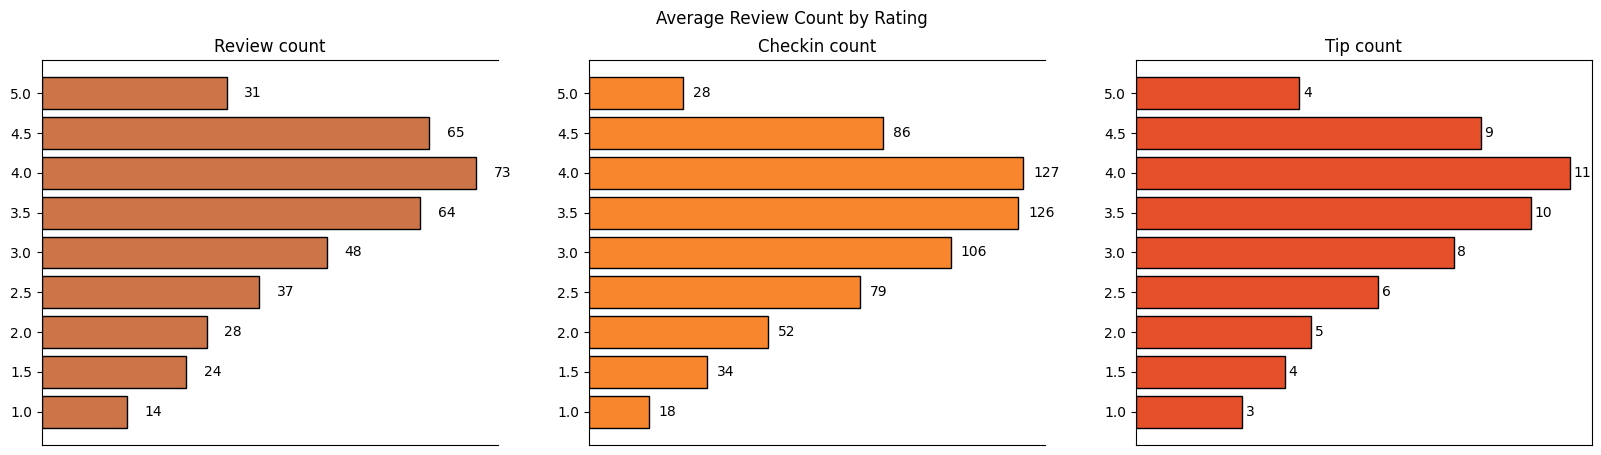

In [39]:
plt.figure(figsize=(20, 5))
#plt.title('Average Review Count by Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1, 3, 1)
plt.title('Review count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor='k',color='#cb7548')
plt.gca().spines['right'].set_visible(False)
for i,value in enumerate(review_count_df['avg_review_count']):
  plt.text(value+3,i,str(round(value)),color='black',va='center')

plt.xticks([])
plt.subplot(1, 3, 2)
plt.title('Checkin count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor='k',color='#F8862C')
plt.gca().spines['right'].set_visible(False)
for i,value in enumerate(review_count_df['avg_checkin_count']):
  plt.text(value+3,i,str(round(value)),color='black',va='center')

plt.xticks([])
plt.subplot(1, 3, 3)
plt.title('Tip count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor='k',color='#E54F29')
#plt.gca().spines['right'].set_visible(False)
for i,value in enumerate(review_count_df['avg_tip_count']):
  plt.text(value+0.09,i,str(round(value)),color='black',va='center')

plt.suptitle('Average Review Count by Rating')
plt.xticks([])
plt.show()


*   Data shows a general increase in average reviews, check-in, and tip counts as ratings improve from 1 to 4 stars.
*   Restaurants rated 4 stars exibits the highest engagment across reviews, check-ins and tips, suggesting a peak in user interaction
*   Interestingly, engagment metrics (reviews,check-in,tips) for restaurants rated 4.5 and significantly more at 5 stars.
*   The drop in engagment at 5.0 stars might suggest either a restaurant point where fewer customers feel compelled to add ther revires, or a selectivity where onlya small, satisfied audiance frequents these establishments.





In [40]:
# is there a co-relation between number of reviews, tips and checkin for business?
engagement_df = pd.read_sql_query(f"""select
  b.business_id,
  sum(b.review_count) as review_count,
  avg(b.stars) as avg_rating,
  sum(length(cc.date) - length(replace(cc.date,',',''))+1) as checkin_count,
  sum(t.tip_count) as tip_count
from
  business b
left join
  checkin cc on b.business_id = cc.business_id
left join
  (select business_id, count(business_id) as tip_count from tip group by business_id) t on b.business_id = t.business_id
where
  b.business_id in {tuple(business_id['business_id'])}
group by
  b.business_id""", conn).dropna()

In [41]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


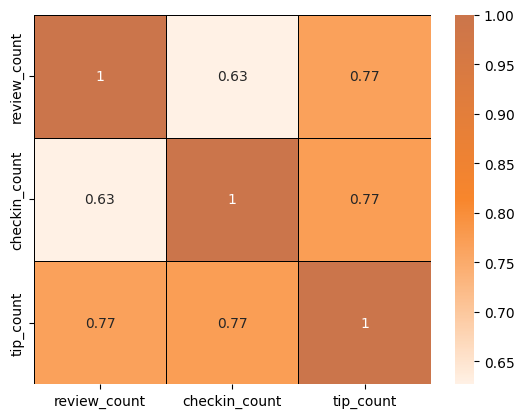

In [42]:
color = ['#FFF1E5','#F8862C','#CB754B']
custom_cmap = LinearSegmentedColormap.from_list("mycmap", color)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(),cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')
plt.show()

In [43]:
# is there a differance in the user engagment (reviews, tips and checkin) between high-rated and low-rated businesses?
rated_business = pd.read_sql_query(f"""select
  b.business_id,
  sum(b.review_count) as review_count,
  avg(b.stars) as avg_rating,
  sum(length(cc.date) - length(replace(cc.date,',',''))+1) as checkin_count,
  sum(t.tip_count) as tip_count,
  (case when avg(b.stars) >= 3.5 then 'high-rated' else 'low-rated' end) as category
from
  business b
left join
  checkin cc on b.business_id = cc.business_id
left join
  (select business_id, count(business_id) as tip_count from tip group by business_id) t on b.business_id = t.business_id
where
  b.business_id in {tuple(business_id['business_id'])}
group by
  b.business_id""", conn).dropna()
rated_business

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,high-rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,low-rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,low-rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,low-rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,low-rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,low-rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,low-rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,high-rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,high-rated


In [45]:
rated_business.groupby('category')[['review_count','checkin_count','tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
high-rated,72.291062,122.066641,10.162766
low-rated,42.123420,88.880828,6.541689



*   The dataset shows a strong positive correlation among review counts, check-in counts and tip counts.
*   These correlations suggest that user engagment across different platform (reviews,tips and check-ins) is interlinked; higher activity in one area tend to be associated with higher activity in others.
*   Businesses should focus on strategies that boost all types of user engagment as increase in one type of engagment are like to drive increase in others, enhancing overall visibilty and interaction with customers.





In [46]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_score(df):
  success_score = []
  for index, row in df.iterrows():
    score = row['avg_rating'] * np.log(row['review_count'] + 1)
    success_score.append(score)
  return success_score

In [47]:
# How do the success score (review_count or avg_rating) of restaurants vary across different states and citys?
city_df = pd.read_sql_query(f"""select city,state,longitude,latitude,avg(stars) as avg_rating, sum(review_count) as review_count,count(*) as restaurant
from business
where business_id in {tuple(business_id['business_id'])}
group by city, state
order by review_count desc
limit 10""", conn)

city_df['success_score'] = calculate_success_score(city_df)

In [48]:
city_df

,city,state,longitude,latitude,avg_rating,review_count,restaurant,success_score
0,Philadelphia,PA,-75.155564,39.955505,3.532156,175487,3001,42.651934
1,Tampa,FL,-82.502346,27.890814,3.571429,104376,1715,41.270588
2,Indianapolis,IN,-86.127217,39.637133,3.412111,92639,1701,39.022521
3,Tucson,AZ,-111.010760,32.338572,3.386187,91613,1419,38.688341
4,Nashville,TN,-86.768170,36.208102,3.493590,87070,1404,39.737764
5,New Orleans,LA,-90.042604,29.963974,3.693676,69239,1012,41.167252
6,Saint Louis,MO,-90.407187,38.583223,3.414303,51490,811,37.042331
7,Reno,NV,-119.784037,39.476518,3.479626,48393,589,37.535187
8,Edmonton,AB,-113.604288,53.436403,3.509379,45916,1546,37.671748
9,Boise,ID,-116.206275,43.611192,3.558824,36104,561,37.346958



*   Philadelphia emerges as the top city with the highest success score, indicating a combination of high ratings and active user engagment.
*   Following Philadelphia, Tampa, Indianapolis and Tucson rank among the top cities with significant successs score, suggesting thriving restaurant scenes in these areas.
*   The success metrics vary significantly across different state and cities, highlighting regional defferences in dining preferances,culinary scenes and customerengagment levels.
*   Identifying cities with high success score presents opportunities for restaurant chain to expand or invest furtherwhile area with lower score may require targeted efforts to improve ratings and increase user engagment.




In [49]:
# create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# define color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', 'red'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())

# add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color=color_scale(row['success_score']),
                        fill=True,
                        fill_color=color_scale(row['success_score']),
                        fill_opacity=0.7,
                        popup=f"success_score: {row['success_score']}"
                        ).add_to(m)

# add color scale to the map
m.add_child(color_scale)

In [50]:
# are there any pattern in user engagement over time for successful business compared to less successful ones?
# are there any seasonal trend in user engagement for restaurants

high_rated_engagment = pd.read_sql_query(f"""select review.month_year,review.review_count,tip.tip_count from
(select strftime('%m-%Y', date) as month_year,count(*) as review_count
from review
where business_id in {tuple(business_id['business_id'])} and stars >= 3.5
group by month_year
order by month_year) as review
join
(select avg(b.stars), strftime('%m-%Y', tip.date) as month_year, count(*) as tip_count
from tip
join business b
on tip.business_id = b.business_id
where tip.business_id in {tuple(business_id['business_id'])} and b.stars >= 3.5
group by month_year
order by month_year) as tip
on review.month_year = tip.month_year;
""",conn)

low_rated_engagment = pd.read_sql_query(f"""select review.month_year,review.review_count,tip.tip_count from
(select strftime('%m-%Y', date) as month_year,count(*) as review_count
from review
where business_id in {tuple(business_id['business_id'])} and stars < 3.5
group by month_year
order by month_year) as review
join
(select avg(b.stars), strftime('%m-%Y', tip.date) as month_year, count(*) as tip_count
from tip
join business b
on tip.business_id = b.business_id
where tip.business_id in {tuple(business_id['business_id'])} and b.stars < 3.5
group by month_year
order by month_year) as tip
on review.month_year = tip.month_year;
""",conn)

In [51]:
low_rated_engagment

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [52]:
high_rated_engagment

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [53]:
time_rating = pd.read_sql_query(f"""select strftime('%m-%Y', date) as month_year, avg(stars) as avg_rating
from review
where business_id in {tuple(business_id['business_id'])}
group by month_year
order by month_year;""",conn)

In [54]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [55]:
# sort the data by month year

time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagment['month_year'] = pd.to_datetime(high_rated_engagment['month_year'])
high_rated_engagment.sort_values('month_year', inplace=True)
high_rated_engagment = high_rated_engagment[high_rated_engagment['month_year']>'2017']

low_rated_engagment['month_year'] = pd.to_datetime(low_rated_engagment['month_year'])
low_rated_engagment.sort_values('month_year', inplace=True)
low_rated_engagment = low_rated_engagment[low_rated_engagment['month_year']>'2017']

In [56]:
high_rated_engagment['avg_rating'] = time_rating['avg_rating']
low_rated_engagment['avg_rating'] = time_rating['avg_rating']

#Tip and Review trend over time

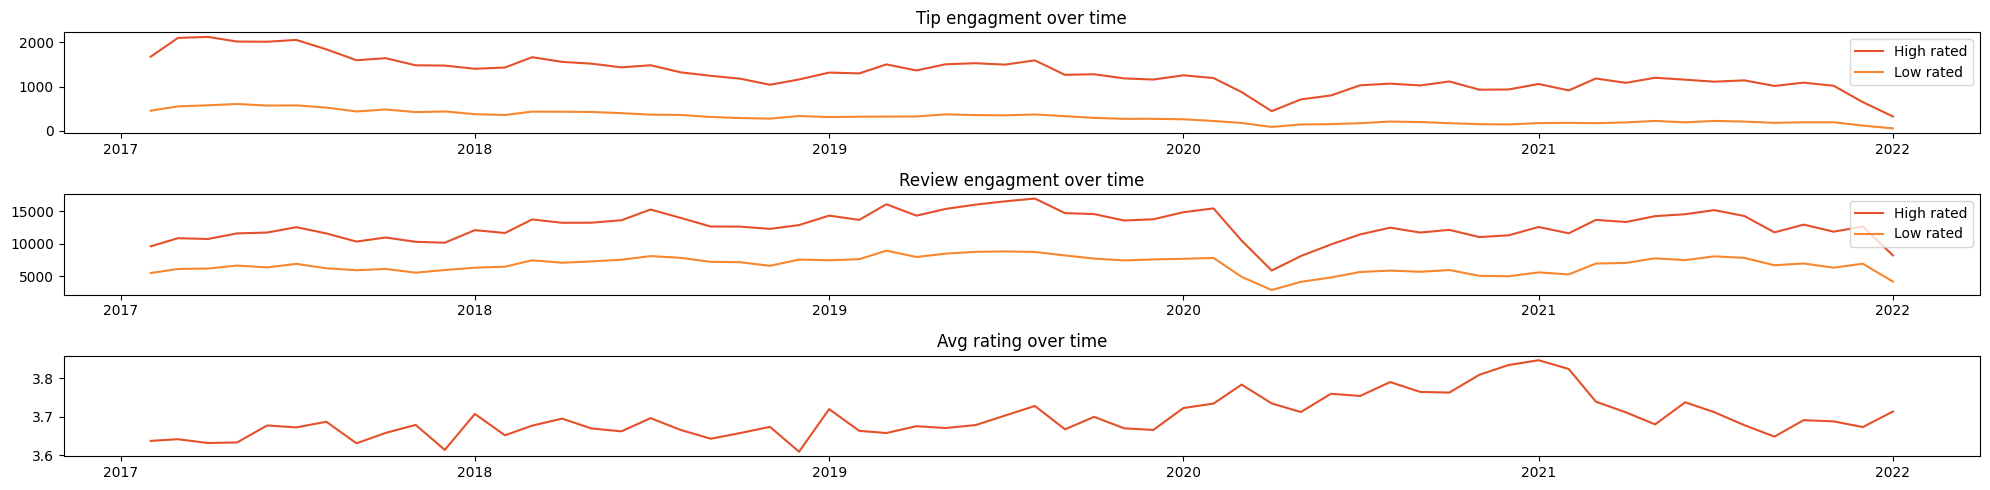

In [57]:
plt.figure(figsize=(20, 5))
plt.subplot(3, 1, 1)
plt.title('Tip engagment over time')
plt.plot(high_rated_engagment['month_year'], high_rated_engagment['tip_count'], label='High rated',color='#E54f29')
plt.plot(low_rated_engagment['month_year'], low_rated_engagment['tip_count'], label='Low rated',color='#f8862C')
plt.legend()

plt.subplot(3, 1, 2)
plt.title('Review engagment over time')
plt.plot(high_rated_engagment['month_year'], high_rated_engagment['review_count'], label='High rated',color='#E54f29')
plt.plot(low_rated_engagment['month_year'], low_rated_engagment['review_count'], label='Low rated',color='#f8862C')
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Avg rating over time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], label='High rated',color='#E54f29')
plt.tight_layout()

plt.show()

In [58]:
tip_high_rated = high_rated_engagment[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagment[['month_year','review_count']].set_index('month_year')
ratng_df = time_rating[['month_year','avg_rating']].set_index('month_year')

In [59]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.4 MB/s eta 0:00:00


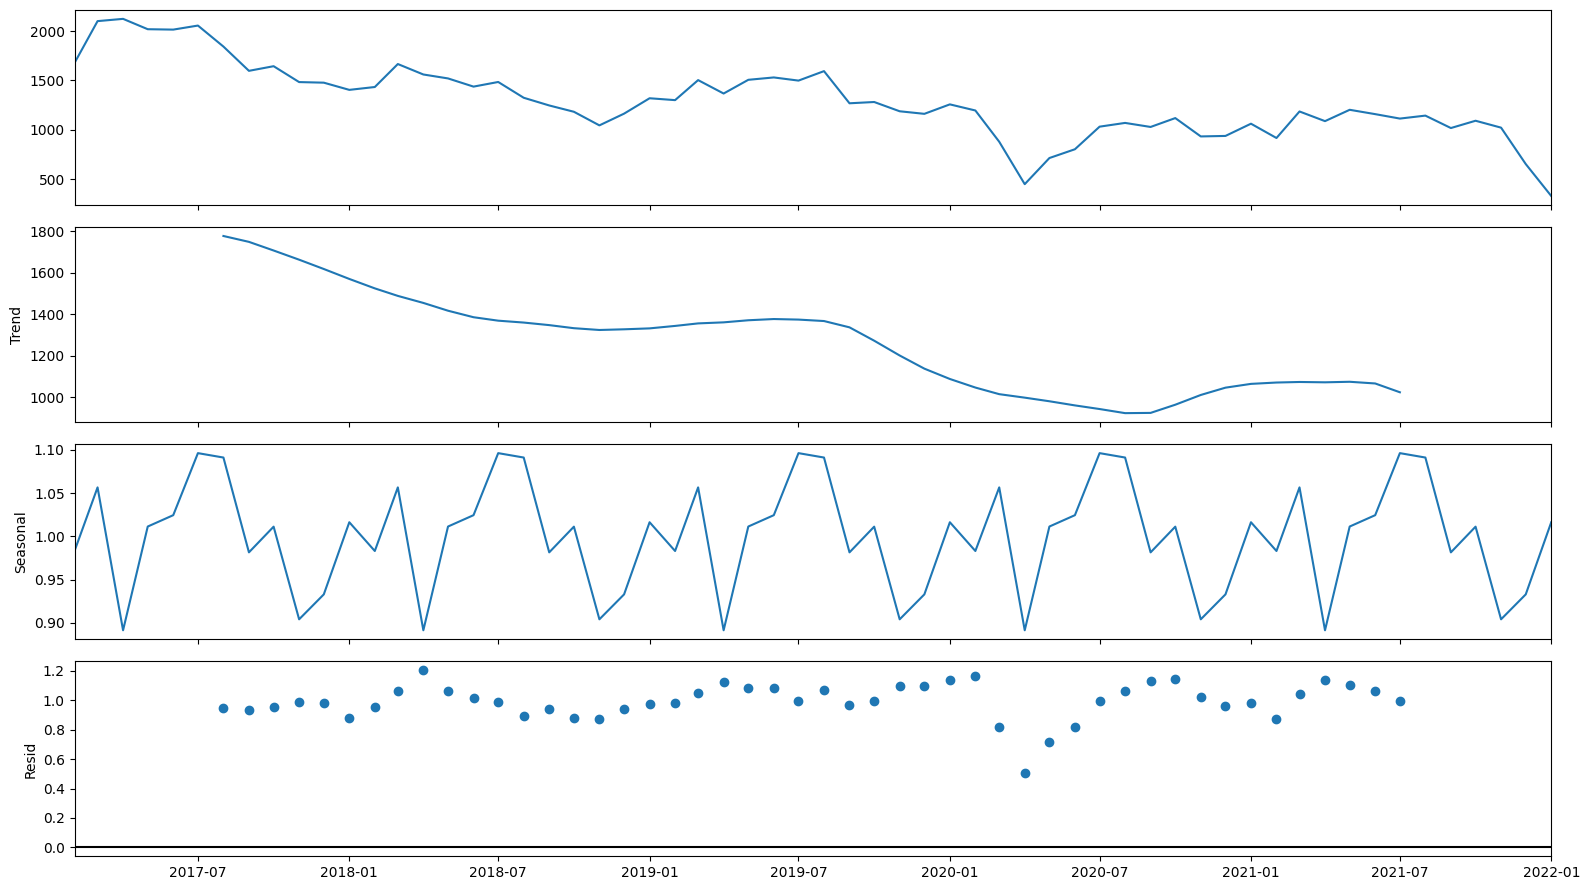

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize' : (16, 9)})
multiplicative_decomposition.plot()
plt.show()

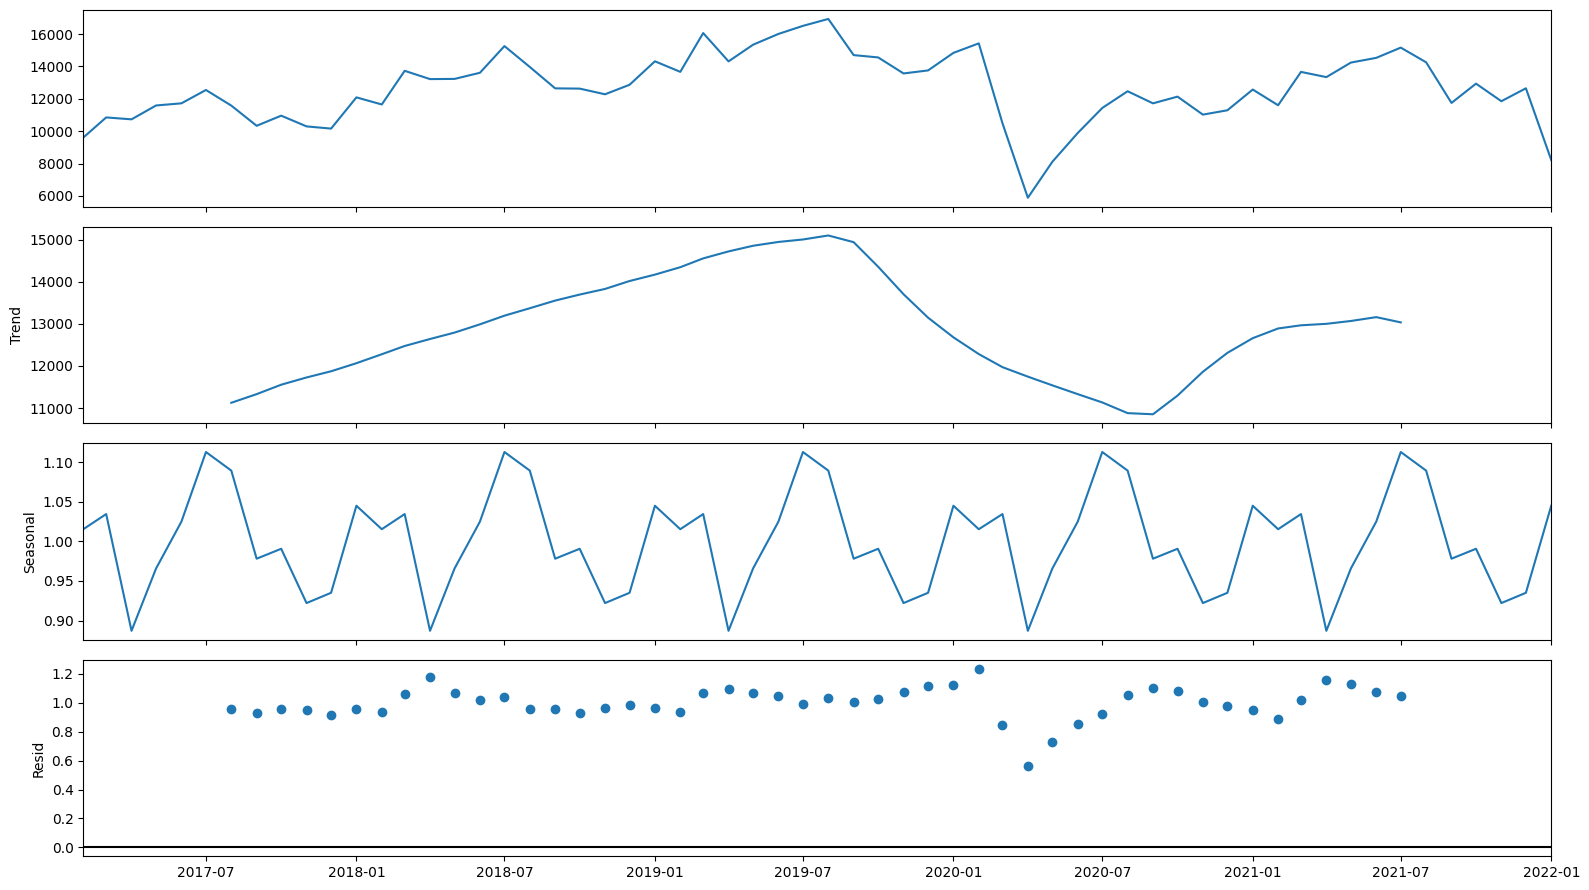

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(review_high_rated, model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize' : (16, 9)})
multiplicative_decomposition.plot()
plt.show()


*   Successful businessess, particularly those with higher rating(above 3.5), exhibit consistent and possibly increasing user engagment over time.
*   High rated restaurants maintain a steady or growing levelof user engagment over time, reflecting ongoing customer interest and satisfaction.
*   Tip count is showing a downward trend whereas review count is showing as upward trend with time.
*   Year starting and year ending from around november and march is highly engaging and seasonal.





In [62]:
# how does the sentiment of reviews and tips(useful, funny, cool) corelate with the success metrics of restaurants?

sentiment_df = pd.read_sql_query(f"""select b.business_id, avg(b.stars) as avg_rating, sum(b.review_count) as review_count,
sum(s.usefull_count) as usefull_count,
sum(s.funny_count) as funny_count,
sum(s.cool_count) as cool_count
from
(select business_id,
  sum(funny) as funny_count,
  sum(useful) as usefull_count,
  sum(cool) as cool_count
from
  review
group by business_id) as s
join business b on s.business_id = b.business_id

where b.business_id in {tuple(business_id['business_id'])}
group by b.business_id
order by review_count""",conn)

In [63]:
sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'usefull_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [64]:
sentiment_df['success_score'] = calculate_success_score(sentiment_df)

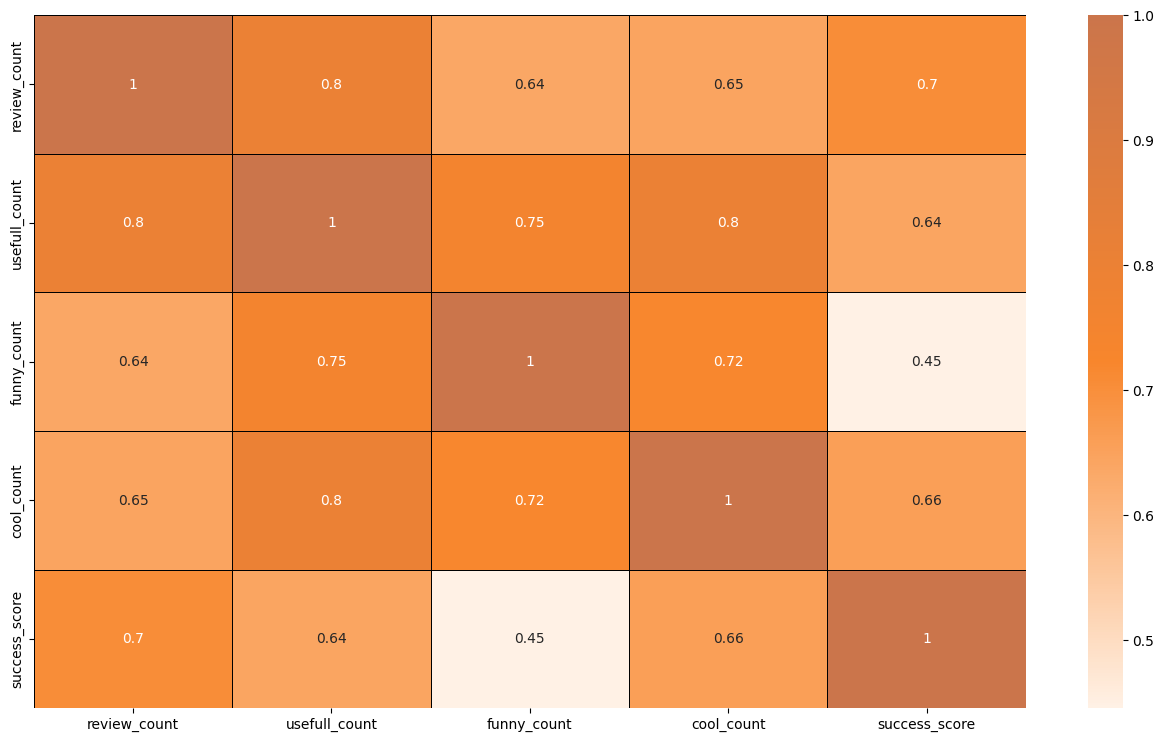

In [65]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(),cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')
plt.show()


*   'useful', 'funny' and 'cool' are attributes associated with user reviews. they represent the feedback provided by users about the usefulness, humor or coolness of a particular review.
*   Higher counts of useful, funny and cool reviews suggest user engagment and satisfaction, which are key factors contributing to a restaurant's successs.





In [66]:
# Is there any differance in engagment of elite users and non elite users?
elite_df = pd.read_sql_query(f"""select
  elite,
  count(*) as row_count,
  sum(review_count) as total_review_count
from
  (select
    case
      when elite = '' then 'non-elite'
      else 'elite'
    end as elite,
    u.review_count
  from
    user u) as user_elite
group by
  elite;""",conn)

In [67]:
elite_df

,elite,row_count,total_review_count
0,elite,91198,20484441
1,non-elite,1896699,26021235


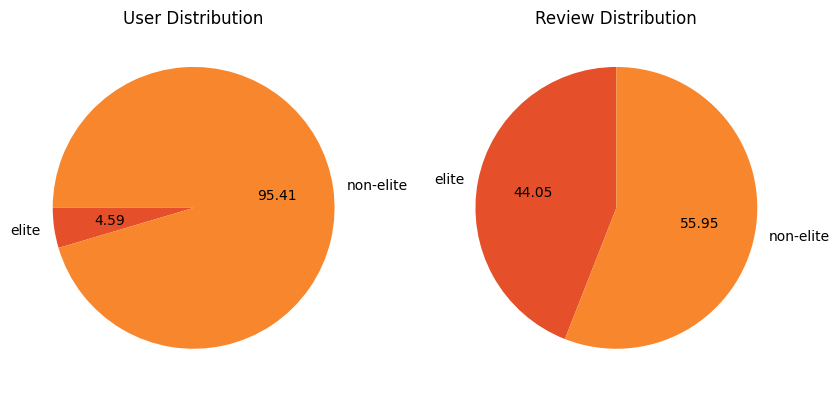

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels=elite_df['elite'],autopct='%.2f',startangle=180,colors=['#E54f29','#f8862C'])

plt.subplot(1, 2, 2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'],autopct='%.2f',startangle=90,colors=['#E54f29','#f8862C'])

plt.show()



*   Elite users are individuals who have been recognized and awarded the "Elite" status by Yelp for thier active and high-quality contributions to the platform, such as frequent and detailed reviews, photos and check-ins, among other criteria.
*   Elite users, despite being significantly fewer in number, contribute a substantial proportion of the total review count compared to non-elite users.
*   Elite users often provide and insightful reviews, which can influence others perceptions and decisions regarding a business.
*   Review from elite users often provide may recieve more attention and visibility on the yelp platform due to their status, potentially leading to higher exposure for businessess.
*   Establishing a postive relationship with elite users can lead to repeat visits and loyalty, as they are more likely to continue supporting businesses they have had good experiences with.



In [104]:
# what are the busiest hours for restaurants?
from datetime import datetime
import pandas as pd

review_engagment = pd.read_sql_query(f"""select
  cast(strftime('%H',date) as integer) as hours,
  count(*) as review_count
from
  review
group by
  hours;
""",conn)

tip_engagment = pd.read_sql_query(f"""select
  cast(strftime('%H',date) as integer) as hours,
  count(*) as tip_count
from
  tip
group by
  hours;
""",conn)

checkin = pd.read_sql_query(f"""select date from checkin """,conn)
check_in_engagment = []
for i in checkin['date']:
  check_in_engagment.extend([datetime.strptime(j.strip(), '%Y-%m-%d %H:%M:%S').strftime('%H') for j in i.split(',')])
check_in_engagment = pd.DataFrame(check_in_engagment).astype('int').groupby(0)[[0]].count()

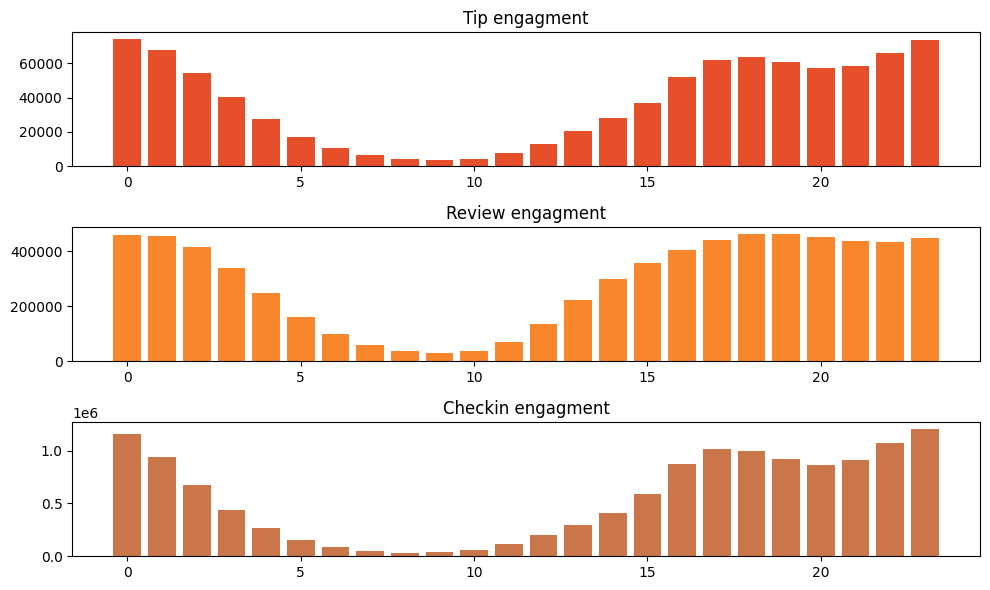

In [105]:
plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1)
plt.title('Tip engagment')
plt.bar(tip_engagment['hours'], tip_engagment['tip_count'],color='#E54f29')

plt.subplot(3, 1, 2)
plt.title('Review engagment')
plt.bar(review_engagment['hours'], review_engagment['review_count'],color='#F8862C')

plt.subplot(3, 1, 3)
plt.title('Checkin engagment')
plt.bar(check_in_engagment.index, check_in_engagment[0],color='#CB754B')

plt.tight_layout()

plt.show()


*   The busiest hour for retaurants, based on user engagement, span from 4pm to 1am.
*   knowing the peak hours allows businesses to optimize their staffing levels and resources allocation during these times to ensure efficient operations and quality service delivery.
*   The concentration of user engagement during the evening and night hours suggests a higher demand for dining out during these times, potentially driven by factors such as work schedules, social gathering and leisure activities.





#**Recomendations**

*   Utilizing insights from the analysis of various metrics such as user sentiment of review, peak hours and impact of elite users, businesses can make informed decisions to drive success.
*   Understanding customer preferances, behavior and satisfaction levels is paramount. businesses should focus on deliveringexeptional experiences to meet customers expectations.
*   By leveraging data on peak hours and user engagement, businesses can optimize staffing levels, resource allocation and operating hours to ensure efficiency and quality service delivery during high-demand periods.
*   Positive reviews from elite users and high user engagement can boost a business's online visibility and reputation. maitaining active engagement with customers and responding promptly to feadback is crucial for building credibility and attracting new customers.
*   Collaborating with elite users and leveraging their influence can amplify promotional efforts, increase brand awarness anddrive customer accquisition. building strong relationship with key stakholders,including loyel customers, can furthur strengthen a business's position in the market.
*   Businesses can adjust thair operating hours or introduce special promotions to capitalize on the increased demand during peak hours.
*   Less successful businesses may need to focus on strategies to enhance user engagement over time, such as improving service quality responding to customer feedback.
*   Cities with high success score presents oppotunities for restaurants chains to expand or invest further.





